# Lab 3: Supervised Learning I - Regression Models

In this lab, we will cover the following topics:
1. Regression models for both continuous and binary outcomes:
    * Linear
    * Polynomial 
    * Logistic 
2. Apply regularization techniques to manage overfitting

Each section includes basic implementation and questions for further exploration.

## 1. Regression Models 
### 1.1 Linear Regression for Continuous Outcomes

We will start by implementing a linear regression model to predict continuous outcomes. We will also explore different parameters and visualize the results.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data
np.random.seed(67)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) + np.random.randn(100, 1) # Added noise 



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=67)

# Train a linear regression model
lin_reg = LinearRegression()
fittedmodel = lin_reg.fit(X_train, y_train)

# print("Model Coefficients: {fittedmodel.coef_}")

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()


ValueError: Expected 2D array, got 1D array instead:
array=[130 130 115 108 126 140 130 130 105 140  94 120 134 140 140 120 150 112
 110 108 126 140 110 110 170 122 150 120 112 150 140 140 136 128 132 122
 110 123 110 178 130 160 118 120 128 105 128 124 140 138 150 125 145 105
 108 160 100 160 120 145 150 124 102 110 130 130 134 130 108 125 142 120
 138 140 110 130 120 130 140 125 140 130 145 150 140 120 138 150 138 120
 140 180 118 130 140 100 120 118 130 130 115 110 150 130 110 138 112 128
 138 117 135 192 120 120 180 120 130 140 138 165 134 120 130 130 118 120
 140 120 128 140 138 110 106 140 140 115 125 102 120 154 125 132 130 156
 110 130 160 122 110 114 128 132 120 130 130 125 134 108 150 140 110  94
 118 120 160 130 128 112 130 140 155 150 132 152 128 148 120 160 104 125
 110 134 132 130 135 130 129 112 132 112 152 145 130 140 144 120 150 158
 124 170 120 135 145 148 135 100 130 132 120 140 120 150].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [38]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

### Questions for Exploration

1. How does changing the `test_size` parameter in the `train_test_split` function affect the model performance?

Increasing the testing size increases the MSE but decreases the accuracy of the model (due to overfitting, which happens when the test size is too large). Decreasing the test size decreases MSE and increases R^2. Is there a way to find the ideal test size for a model? For this model it may be between 0.3 and 0.35.

2. What happens to the model performance if you add noise to the data?

Adding noise is the same as adding more data in this case because all the data is random. 
More data is usually better but because this data is truly random, the model does not benefit from additional data - with enough additional data, error is elevated and accuracy is lowered.


3. How does the model performance change if you use a different random seed for data generation?

The model completely changes because each new random seed is a whole new dataset. How well the model performs on the dataset will depend on the actual values of the data (i.e. maybe a linear regression is not really appropriate for certain datasets so the model suffers)

### 1.2 Polynomial Regression for Continuous Outcomes

Next, we will implement a polynomial regression model to predict continuous outcomes. We will also explore different parameters and visualize the results.

Mean Squared Error: 1.2825567964353868
R^2 Score: 0.818817526357061


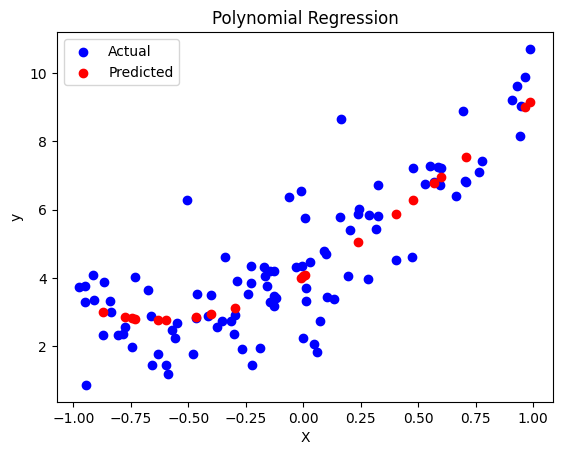

In [62]:
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
np.random.seed(2)
X = 2 * np.random.rand(100, 1) - 1
y = 4 + 3 * X + 2 * X**2 + np.random.randn(100, 1)

# Transform the data to include polynomial features
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=12)

# Train a linear regression model on the polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = poly_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
plt.scatter(X[:, 0], y, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


In [57]:
PolynomialFeatures?

Init signature:
PolynomialFeatures(
    degree=2,
    *,
    interaction_only=False,
    include_bias=True,
    order='C',
)
Docstring:     
Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations
of the features with degree less than or equal to the specified degree.
For example, if an input sample is two dimensional and of the form
[a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

Read more in the :ref:`User Guide <polynomial_features>`.

Parameters
----------
degree : int or tuple (min_degree, max_degree), default=2
    If a single int is given, it specifies the maximal degree of the
    polynomial features. If a tuple `(min_degree, max_degree)` is passed,
    then `min_degree` is the minimum and `max_degree` is the maximum
    polynomial degree of the generated features. Note that `min_degree=0`
    and `min_degree=1` are equivalent as outputting the degree zero term is
    determined by `include_bi

### Questions for Exploration

1. How does changing the degree of the polynomial features affect the model performance?

Again, overfitting. Too many degrees means the model will overfit the training data and perform poorly on test data. 

2. What happens to the model performance if you add higher-degree polynomial features?


3. How does the model performance change if you use a different random seed for data generation?

The model changes because it's a new dataset.


### 1.3 Logistic Model for Binary Outcomes

Next, we will implement a logistic regression model to predict binary outcomes. We will also explore different parameters and visualize the results.

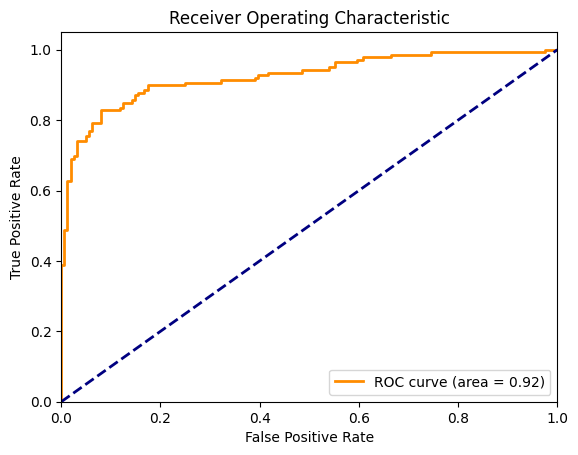

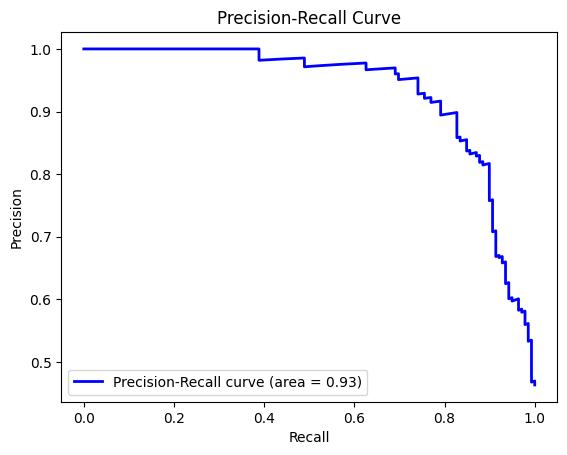

In [88]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.5, 0.5], random_state=2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Train a logistic regression model
log_reg = LogisticRegression(penalty='l2')
log_reg.fit(X_train, y_train)

# Predict probabilities
y_scores = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and PR area
precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve: shows if you have an imbalanced dataset. Tells you how good your model is compared to random 
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [77]:
#LogisticRegression?
make_classification?

Signature:
make_classification(
    n_samples=100,
    n_features=20,
    *,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=None,
)
Docstring:
Generate a random n-class classification problem.

This initially creates clusters of points normally distributed (std=1)
about vertices of an ``n_informative``-dimensional hypercube with sides of
length ``2*class_sep`` and assigns an equal number of clusters to each
class. It introduces interdependence between these features and adds
various types of further noise to the data.

Without shuffling, ``X`` horizontally stacks features in the following
order: the primary ``n_informative`` features, followed by ``n_redundant``
linear combinations of the informative features, followed by ``n_repeated``
duplicates, drawn randomly with replacement from the infor

### Questions for Exploration

1. How does changing the `C` parameter in the `LogisticRegression` model affect the model performance?
Tried setting C =0.1 and C =100 and the ROC and precision recall curves barely changed. 

 A high value of C tells the model to give high weight to the training data, and a lower weight to the complexity penalty. A low value tells the model to give more weight to this complexity penalty at the expense of fitting to the training data. Basically, a high C means "Trust this training data a lot", while a low value says "This data may not be fully representative of the real world data, so if it's telling you to make a parameter really large, don't listen to it".

2. What happens to the ROC curve and AUC score when you change the class weights?

When class weights are balanced, the ROC is near the top left and the AUC value is high (0.91). More balanced class weights enable the model to have better prediction performance. 
Strongly skewed class weights give an AUC of 0.86 and the curve is less towards the top left corner.

3. How does the model performance change if you use a different random seed for data generation?

Makes sense that model output is random when model input is random.

## 2 Regularization Techniques to Manage Overfitting

Finally, we will apply regularization techniques such as Ridge and Lasso regression to manage overfitting. We will also explore different parameters and visualize the results.

Ridge Regression - Mean Squared Error: 0.6527084375244318, R^2 Score: 0.8074982593526749
Lasso Regression - Mean Squared Error: 0.6584189249611411, R^2 Score: 0.8058140789310452
Elastic Net - Mean Squared Error: 0.6987956291013825, R^2 Score: 0.7939058740086787


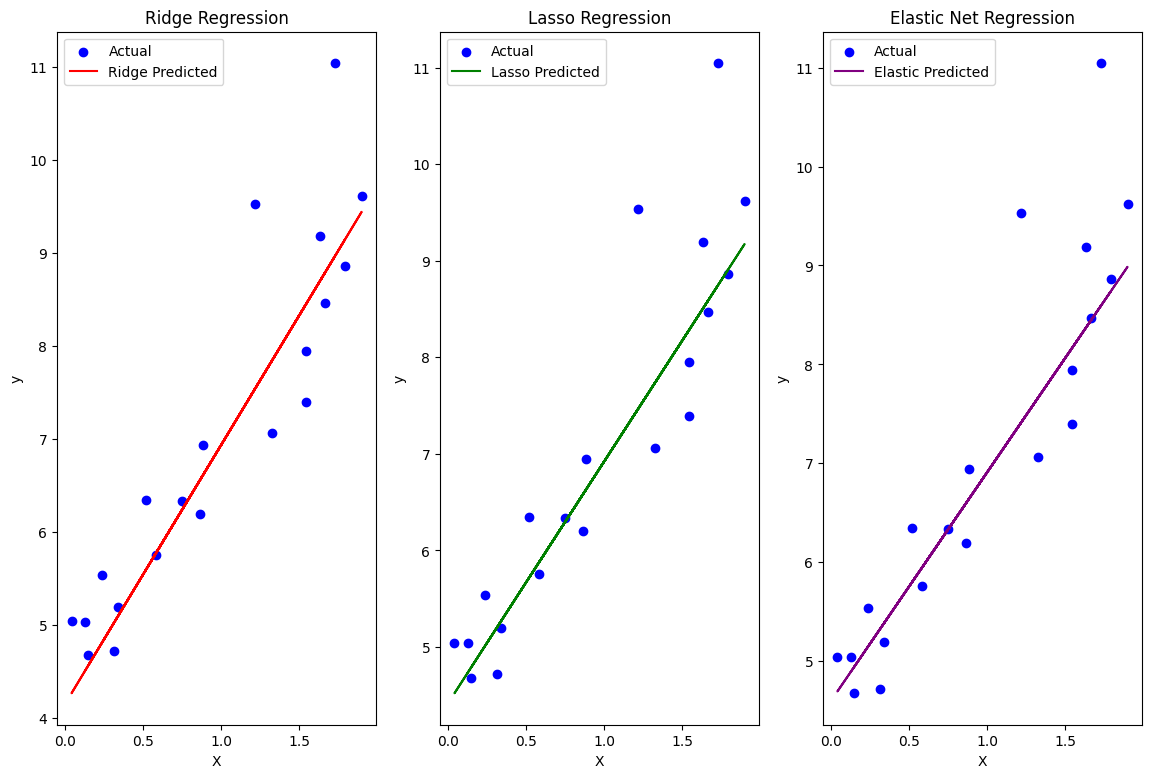

In [104]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Ridge regression model
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train, y_train)

# Train a Lasso regression model
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

# Train an ElasticNet regression model
elastic_reg = ElasticNet(alpha=0.1)
elastic_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)
y_pred_elastic = elastic_reg.predict(X_test)

# Evaluate the models
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)


print(f"Ridge Regression - Mean Squared Error: {mse_ridge}, R^2 Score: {r2_ridge}")
print(f"Lasso Regression - Mean Squared Error: {mse_lasso}, R^2 Score: {r2_lasso}")
print(f"Elastic Net - Mean Squared Error: {mse_elastic}, R^2 Score: {r2_elastic}")

# Plot the results
plt.figure(figsize=(14, 9))
plt.subplot(1, 3, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_ridge, color='red', label='Ridge Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_lasso, color='green', label='Lasso Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Lasso Regression')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_elastic, color='purple', label='Elastic Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Elastic Net Regression')
plt.legend()

plt.show()


In [61]:
# Ridge?
# Lasso?
ElasticNet?

Init signature:
ElasticNet(
    alpha=1.0,
    *,
    l1_ratio=0.5,
    fit_intercept=True,
    precompute=False,
    max_iter=1000,
    copy_X=True,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function::

        1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty
separately, keep in mind that this is equivalent to::

        a * ||w||_1 + 0.5 * b * ||w||_2^2

where::

        alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while
alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
= 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
unless you supply your own sequence of alpha.

Read mo

### Questions for Exploration

1. How does changing the `alpha` parameter in the `Ridge` and `Lasso` models affect the model performance?

alpha is a hyperparameter that controls the strength of regularization applied to the model, essentially determining how much the coefficients are shrunk towards zero.
Alpha refers to the ratio between L1 and L2: Lasso alpha would be 0, Ridge alpha would be 1 (I may have this backwards??). Elastic net can be between 0 and 1 and describes the combination of L1 and L2 penalty being applied.

2. What happens to the model performance if you use different values of `alpha`?
3. Try implementing an `ElasticNet` model in the cell above.
    * How does it compare to the `Ridge` and `Lasso` models?
    Not as effective - lower R2 and higher error.
    * How does changing `alpha` affect the model performance? 

4. How does the model performance change if you use a different random seed for data generation?

## Extensions

1. Create new features from the existing ones (e.g., interaction terms, polynomial features) and evaluate their impact on model performance.
2. How does feature scaling (e.g., standardization, normalization) affect the performance of linear, polynomial, and logistic models?
3. Compare the performance of linear, polynomial, and logistic models on the same dataset using various evaluation metrics (e.g., R^2, MSE, ROC AUC).